In [ ]:
## iMPORTANDO O DATASET VIA API DO KAGGLE ##

from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

dataset_name = "lfarhat/brasil-students-scholarship-prouni-20052019"
api.dataset_download_files(dataset_name, path='.', unzip=True)

In [ ]:
import pandas as pd
import numpy as np
import csv

In [ ]:
df = pd.read_csv('prouni_2005_2019.csv')

In [ ]:
df.describe()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,idade
count,2.692540e+06,2.692540e+06,2.692540e+06
mean,2.013202e+03,1.557752e+03,3.137911e+01
std,4.060982e+00,2.423453e+03,7.974098e+00
min,2.005000e+03,1.000000e+01,2.000000e+00
25%,2.010000e+03,3.220000e+02,2.500000e+01
50%,2.014000e+03,8.020000e+02,3.000000e+01
75%,2.017000e+03,1.742000e+03,3.500000e+01
max,2.019000e+03,2.251400e+04,1.500000e+02


In [ ]:
df.head()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,idade
0,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Enfermagem,Integral,***264740**,F,Branca,1987-02-17,nao,SUL,RS,santo angelo,34.0
1,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Servico Social,Noturno,***976940**,F,Parda,1986-06-14,nao,SUL,RS,frederico westphalen,35.0
2,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Servico Social,Noturno,***045340**,F,Parda,1984-06-03,nao,SUL,RS,frederico westphalen,37.0
3,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Ciencia Da Computacao,Noturno,***988420**,M,Branca,1987-10-19,nao,SUL,RS,frederico westphalen,33.0
4,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Ciencia Da Computacao,Noturno,***378080**,M,Amarela,1987-07-20,nao,SUL,RS,frederico westphalen,34.0


In [ ]:
df.shape

(2692540, 16)

In [ ]:
df.info(show_counts=True) # UTILIZANDO O SHOW_COUNTS CASO NÃO APARECE A QUANTIDADE DE NON NULOS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692540 entries, 0 to 2692539
Data columns (total 16 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   ANO_CONCESSAO_BOLSA             2692540 non-null  int64  
 1   CODIGO_EMEC_IES_BOLSA           2692540 non-null  int64  
 2   NOME_IES_BOLSA                  2692051 non-null  object 
 3   TIPO_BOLSA                      2692540 non-null  object 
 4   MODALIDADE_ENSINO_BOLSA         2692540 non-null  object 
 5   NOME_CURSO_BOLSA                2686886 non-null  object 
 6   NOME_TURNO_CURSO_BOLSA          2692540 non-null  object 
 7   CPF_BENEFICIARIO_BOLSA          2692540 non-null  object 
 8   SEXO_BENEFICIARIO_BOLSA         2692540 non-null  object 
 9   RACA_BENEFICIARIO_BOLSA         2692540 non-null  object 
 10  DT_NASCIMENTO_BENEFICIARIO      2692540 non-null  object 
 11  BENEFICIARIO_DEFICIENTE_FISICO  2692540 non-null  object 
 12  

In [ ]:
df[df.idade < 16]

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,idade
2232,2005,163,UNIVERSIDADE ESTACIO DE SA,BOLSA INTEGRAL,PRESENCIAL,Administracao,Noturno,***942417**,M,Branca,2005-11-18,nao,SUDESTE,RJ,campos dos goytacazes,15.0
5487,2005,163,UNIVERSIDADE ESTACIO DE SA,BOLSA INTEGRAL,PRESENCIAL,Direito,Noturno,***256647**,F,Branca,2007-02-19,nao,SUDESTE,RJ,petropolis,14.0
24058,2005,1314,INSTITUTO DE ENSINO SUPERIOR JOAO ALFREDO DE A...,BOLSA PARCIAL 50%,PRESENCIAL,Administracao,Noturno,***518016**,F,Branca,2006-04-17,nao,SUDESTE,MG,juatuba,15.0
49831,2005,165,UNIVERSIDADE VEIGA DE ALMEIDA,BOLSA INTEGRAL,PRESENCIAL,Enfermagem,Noturno,***347687**,F,Parda,2005-10-12 00:00:00,nao,SUDESTE,RJ,cabo frio,15.0
96002,2006,330,UNIVERSIDADE IGUACU,BOLSA INTEGRAL,PRESENCIAL,Direito,Noturno,***067487**,M,Branca,2005-10-11,nao,SUDESTE,RJ,itaperuna,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472645,2014,3990,FACULDADE SAO BERNARDO DE TECNOLOGIA,BOLSA INTEGRAL,PRESENCIAL,Automacao Industrial,Noturno,***024597**,M,Nao Informada,2013-06-21,nao,SUDESTE,RJ,belford roxo,8.0
1503805,2015,296,UNIVERSIDADE DA REGIAO DA CAMPANHA,BOLSA INTEGRAL,PRESENCIAL,Direito,Noturno,***988710**,M,Branca,2005-11-22,nao,SUL,RS,sant'ana do livramento,15.0
1598945,2015,3193,FACULDADES INTEGRADAS DOS CAMPOS GERAIS,BOLSA INTEGRAL,PRESENCIAL,Producao Publicitaria,Noturno,***480169**,F,Nao Informada,2015-12-07,nao,SUL,PR,ponta grossa,5.0
1615420,2015,13783,FACULDADES UNIDAS FEIRA DE SANTANA,BOLSA INTEGRAL,PRESENCIAL,Radiologia,Noturno,***659035**,F,Parda,2019-08-14,nao,NORDESTE,BA,feira de santana,2.0


In [ ]:
df[df.RACA_BENEFICIARIO_BOLSA == 'Nao Informada']

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,idade
12,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA INTEGRAL,PRESENCIAL,Engenharia Agricola,Noturno,***188290**,M,Nao Informada,1984-06-15,nao,SUL,RS,santiago,37.0
13,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Engenharia Agricola,Noturno,***332450**,M,Nao Informada,1978-09-08,nao,SUL,RS,santiago,43.0
14,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA INTEGRAL,PRESENCIAL,Engenharia Agricola,Noturno,***263550**,M,Nao Informada,1976-09-22,nao,SUL,RS,santiago,45.0
15,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Engenharia Agricola,Noturno,***287980**,M,Nao Informada,1957-03-15,nao,SUL,RS,santiago,64.0
18,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA INTEGRAL,PRESENCIAL,Engenharia Agricola,Noturno,***040670**,M,Nao Informada,1979-03-01,nao,SUL,RS,santiago,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2600074,2019,1196,CENTRO UNIVERSITARIO DE MARINGA - UNICESUMAR,BOLSA INTEGRAL,EAD,EducaAAo FAsica,A Distancia,***22623215**,M,Nao Informada,1984-04-03,nao,NORTE,PA,ananindeua,37.0
2613367,2019,1492,FACULDADE PITAGORAS DE UBERLANDIA,BOLSA INTEGRAL,PRESENCIAL,Redes De Computadores,Noturno,***25698127**,M,Nao Informada,2000-08-16,nao,SUDESTE,MG,uberlandia,21.0
2617832,2019,1774,FACULDADE EDUCACIONAL DE PONTA GROSSA,BOLSA INTEGRAL,PRESENCIAL,Enfermagem,Matutino,***99249858**,F,Nao Informada,2001-07-28,nao,SUDESTE,SP,adamantina,20.0
2626965,2019,1492,FACULDADE PITAGORAS DE UBERLANDIA,BOLSA INTEGRAL,PRESENCIAL,Engenharia MecAnica,Noturno,***60774639**,M,Nao Informada,2000-12-02,nao,SUDESTE,MG,uberlandia,20.0


In [ ]:
# idade média por estado

grp_categoria = df.groupby('SIGLA_UF_BENEFICIARIO_BOLSA')['idade'].mean()
print(grp_categoria)

SIGLA_UF_BENEFICIARIO_BOLSA
AC    30.524442
AL    31.526172
AM    32.078332
AP    30.891748
BA    32.633209
CE    29.269925
DF    30.609771
ES    31.311957
GO    30.603906
MA    29.297176
MG    31.574721
MS    32.865546
MT    32.442872
PA    31.693856
PB    30.670495
PE    30.399667
PI    29.862646
PR    31.697034
RJ    32.019358
RN    32.687947
RO    31.078521
RR    33.370250
RS    31.534676
SC    29.528055
SE    31.641327
SP    31.481957
TO    29.214831
Name: idade, dtype: float64


In [ ]:
# idade média por ano.

grp_categoria_2 = df.groupby('ANO_CONCESSAO_BOLSA')['idade'].mean()
print(grp_categoria_2)

ANO_CONCESSAO_BOLSA
2005    37.828933
2006    37.860399
2007    37.538542
2008    36.816243
2009    36.045238
2010    35.012564
2011    33.971423
2012    33.015410
2013    32.021322
2014    31.231724
2015    29.829432
2016    28.471960
2017    27.111327
2018    26.172653
2019    25.083093
Name: idade, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

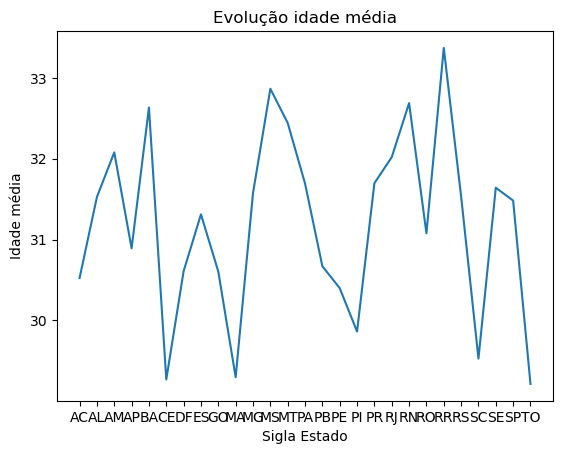

In [ ]:

plt.xlabel('Sigla Estado')
plt.ylabel('Idade média')
plt.title('Evolução idade média')
plt.plot(grp_categoria)

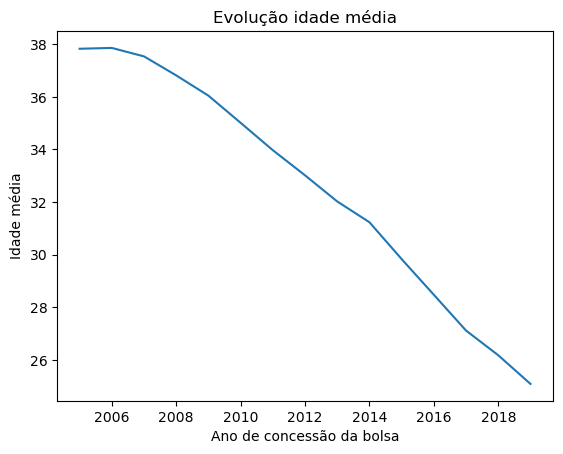

In [ ]:
plt.xlabel('Ano de concessão da bolsa')
plt.ylabel('Idade média')
plt.title('Evolução idade média')
plt.plot(grp_categoria_2)


plt.xlabel('Ano de concessão da bolsa')
plt.ylabel('Idade média')
plt.title('Evolução idade média')
plt.plot(grp_categoria_2)